In [1]:
import pandas as pd

In [2]:
orders=pd.read_csv('./data/orders.csv')

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## 데이터 파악

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [5]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

### Result 
- days_since_prior_order 에 결측값이 있는 것 확인  
days_since_prior_order은 마지막 구매일로부터 걸린 시간을 의미하며 NA값은 첫 구매임
- days_since_prior_order에 대해 세부적으로 확인해보기

In [4]:
orders['days_since_prior_order'].unique()

array([nan, 15., 21., 29., 28., 19., 20., 14.,  0., 30., 10.,  3.,  8.,
       13., 27.,  6.,  9., 12.,  7., 17., 11., 22.,  4.,  5.,  2., 23.,
       26., 25., 16.,  1., 18., 24.])

### Visualization
- days_since_prior_order 값의 분포에 대해 선히스토그램 그래프 그리기

In [5]:
# days_since_prior_order의 nan값의 갯수도 확인 하기 위해 NAN값을 -1로 처리
orders['days_since_prior_order']=orders['days_since_prior_order'].fillna(-1)

In [6]:
orders['days_since_prior_order'].unique()

array([-1., 15., 21., 29., 28., 19., 20., 14.,  0., 30., 10.,  3.,  8.,
       13., 27.,  6.,  9., 12.,  7., 17., 11., 22.,  4.,  5.,  2., 23.,
       26., 25., 16.,  1., 18., 24.])

In [7]:
f_p_order=pd.pivot_table(orders, index = ['days_since_prior_order'], values=['order_id'], aggfunc='count')

In [8]:
f_p_order

,order_id
days_since_prior_order,
-1.0,206209
0.0,67755
1.0,145247
2.0,193206
3.0,217005
4.0,221696
5.0,214503
6.0,240013
7.0,320608


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x223a6a95bc8>,
 'caps': [<matplotlib.lines.Line2D at 0x223a6aa9888>,
 'boxes': [<matplotlib.lines.Line2D at 0x223a6aa5348>],
 'medians': [<matplotlib.lines.Line2D at 0x223a6aacbc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x223a6aacc88>],
 'means': []}

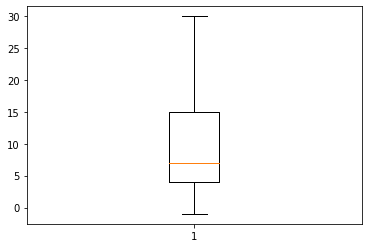

In [11]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(orders['days_since_prior_order'], flierprops=green_diamond)

Text(0, 0.5, 'num of order')

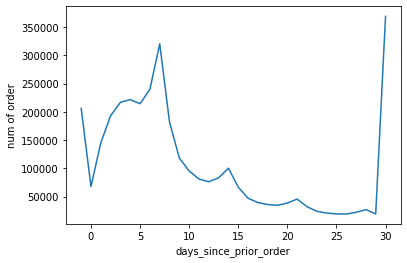

In [12]:
sns.lineplot(x='days_since_prior_order', y='order_id', data=f_p_order)
plt.ylabel('num of order')

## 1. 주말(토,일)에 주문량이 더 많다

### 1-1 ) groupby수행하여 요약변수 생성 (Total_orders)
- 요일별 주문량에 대해 count, groupby수행
- 요일을 나타내는 column : order_dow
- 주문량을 나타내는 dataframe: order_info.csv ( order_products_prior & order_products_train Merge)

In [13]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,-1.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [16]:
order_total_week = orders.groupby("order_dow")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [17]:
order_total_week

,order_dow,Total_orders
0,0,600905
1,1,587478
2,2,467260
3,3,436972
4,4,426339
5,5,453368
6,6,448761


### Visualize 
- visualize하기 위해 order_dow에 대한 파생변수 생성 
- order_dow => 0: sunday  ~ 6 :Satuday

### 1-2) order_dow를 요일 이름으로 변환하여 파생변수 생성 (day)

In [19]:
def change_od(od):
    if od==0: day='Sunday'
    elif od==1: day='Monday'
    elif od==2: day='Tuesday'
    elif od==3: day='Wednesday'
    elif od==4: day='Thursday'
    elif od==5: day='Friday'
    else: day='Saturday'
    return day

In [20]:
order_total_week['day']=order_total_week['order_dow'].apply(lambda x: change_od(x))

In [21]:
order_total_week

,order_dow,Total_orders,day
0,0,600905,Sunday
1,1,587478,Monday
2,2,467260,Tuesday
3,3,436972,Wednesday
4,4,426339,Thursday
5,5,453368,Friday
6,6,448761,Saturday


### 1-3) 시각화

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


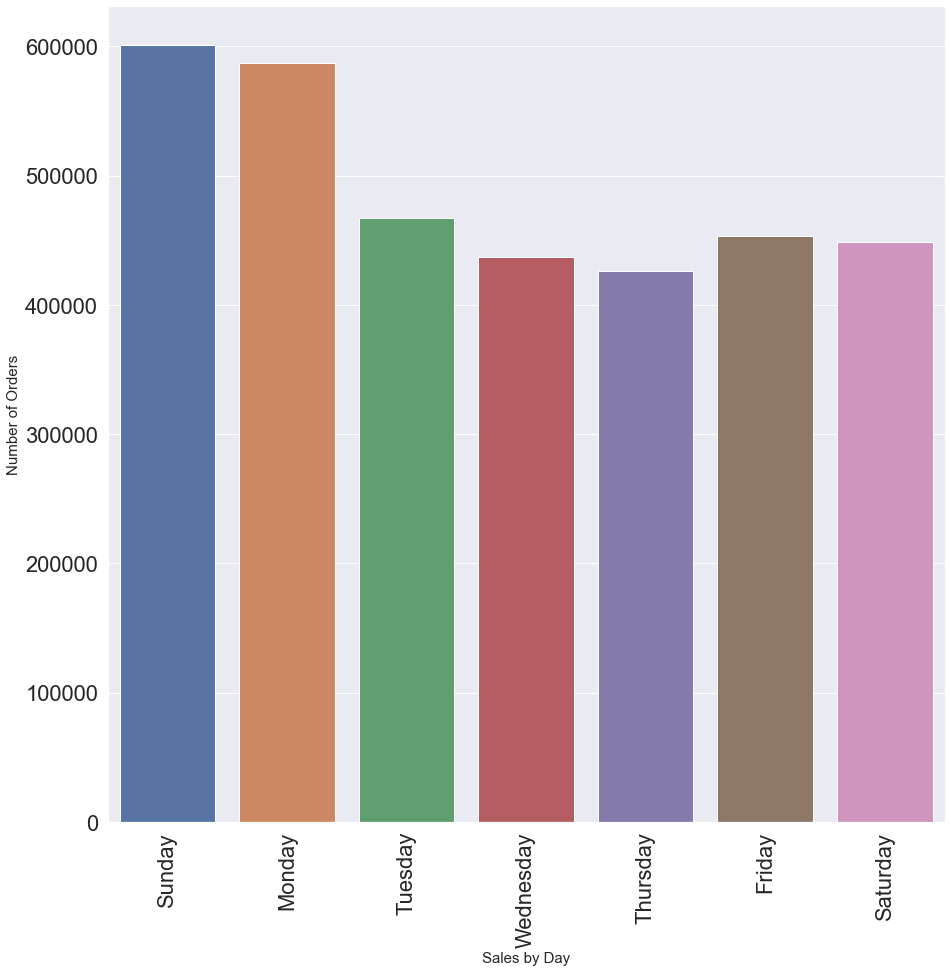

In [24]:
sns.set(font_scale=2)
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 15))
plt.xticks(rotation='vertical')
sns.barplot(order_total_week.day, order_total_week.Total_orders)          
plt.ylabel('Number of Orders', fontsize=15)
plt.xlabel('Sales by Day', fontsize=15)
# plt.show()
plt.savefig('hypo4.png')

## 2.  요일 & 시간별 주문량 알아보기
### 2-1)  요일 & 시간별 주문량 알아보기

In [25]:
# 날 별 시간별 주문량 확인
order_time = orders.groupby(["order_dow", "order_hour_of_day"])["order_id"].aggregate({'num_orders': 'count'}).reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


In [26]:
order_time.head()

,order_dow,order_hour_of_day,num_orders
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813


### 2-2 ) order_dow를 요일 이름으로 변환하는 파생변수 추가

In [27]:
# over_dow에 대해서 요일 컬럼 만들기
order_time['day']=order_time['order_dow'].apply(lambda x: change_od(x))

In [28]:
order_time.head()

,order_dow,order_hour_of_day,num_orders,day
0,0,0,3936,Sunday
1,0,1,2398,Sunday
2,0,2,1409,Sunday
3,0,3,963,Sunday
4,0,4,813,Sunday


### 1-3) 요일/시간별 주문량을 pivot table로 만들어 확인

In [30]:
aa=pd.pivot_table(order_time, index='order_hour_of_day', columns='day', values='num_orders')

In [31]:
aa.head()

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
order_hour_of_day,,,,,,,
0,3189,3674,3306,3936,2642,3059,2952
1,1672,1830,1919,2398,1512,1572,1495
2,1016,1105,1214,1409,899,943,953
3,841,748,863,963,686,719,654
4,910,809,802,813,730,744,719


In [34]:
aa=aa[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

In [35]:
aa=aa.sort_index(ascending=False)

In [37]:
aa.head()

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
order_hour_of_day,,,,,,,
23,5620,5358,5181,5645,5265,6087,6887
22,8992,8146,8242,8812,7498,8532,11246
21,11943,10653,10278,10796,9515,10501,14423
20,16281,15039,13795,14186,13322,13392,18277
19,22145,20084,19249,19350,18741,18346,22654


### 2-4) Visualize 

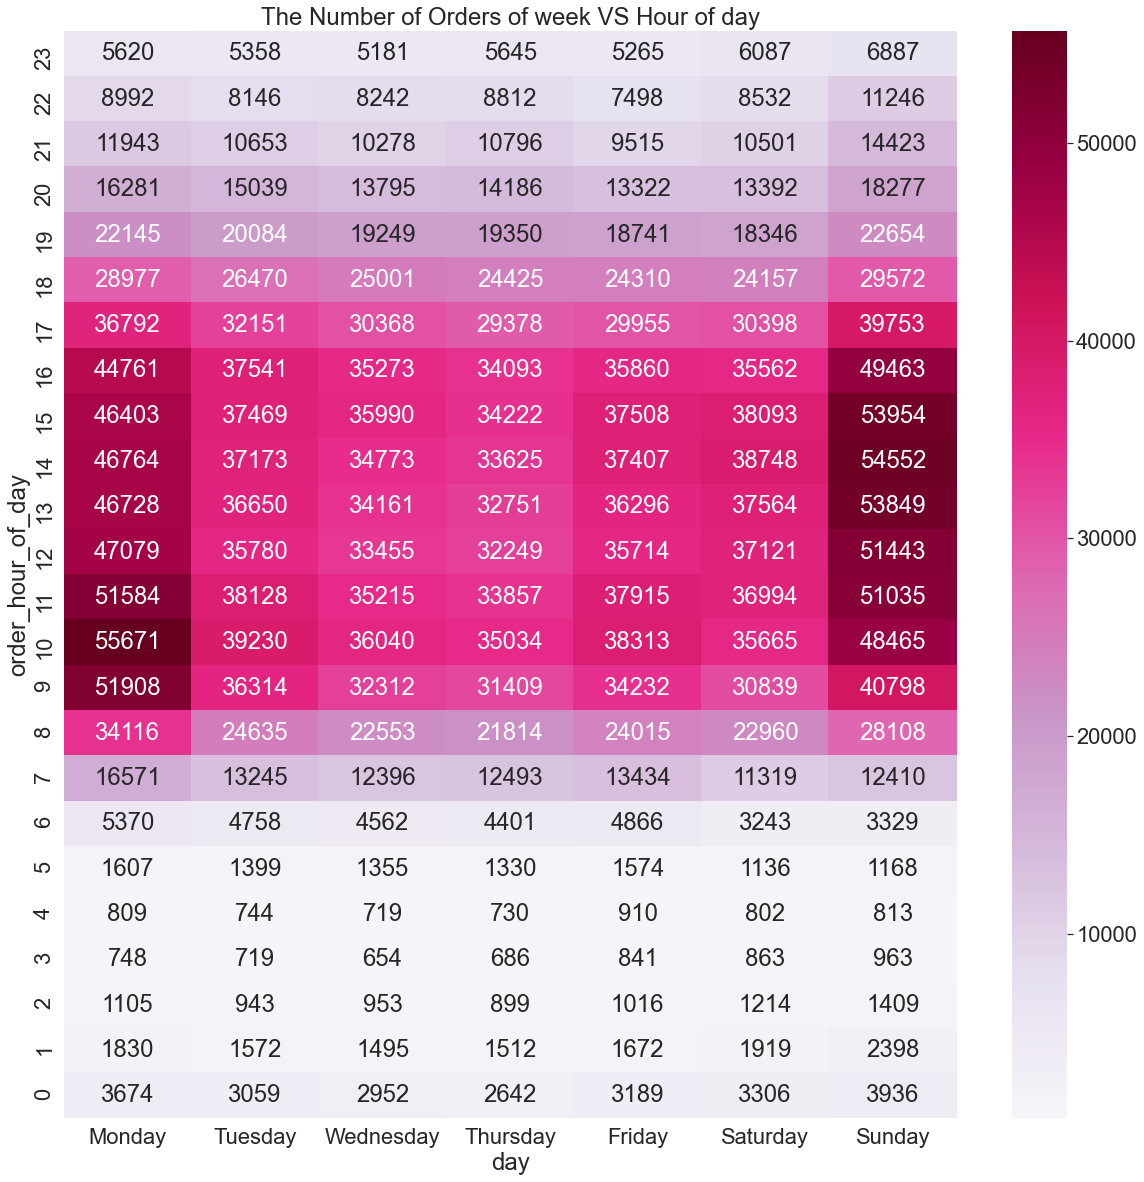

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(aa,  annot=True, fmt='d',cmap='PuRd')
plt.title("The Number of Orders of week VS Hour of day")
# plt.show()
plt.savefig('hypo5.png')


### Result
- 요일 / 시간별 주문량을 Heatmap으로 표현한 결과 월요일 9시~11시와 일요일 13시~16시의 주문량이 다른 시간대에 비해 많다는 것을 알 수 있음
- 공통적으로 새벽 시간대에는 주문량이 매우 적음
- 또한,  다른 시간대에 비해 9시~15시 사이에 주문량이 많아지는 양상을 보임